In [ ]:
# 네이버 영화리뷰 감성 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# 외국 imdb : 영화리뷰 분석 
# 네이버 무비 dataset
# 직접 크롤링 해서 사용하면됨

train = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', sep ='\t')
test = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", sep ='\t')

In [ ]:
train.head(5)
# 0 : 재미없다, 1: 재밋다. 
# 보통 평점 7점이상 재밋다. 

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
train.info(), train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


(None, id          0
 document    5
 label       0
 dtype: int64)

In [ ]:
train[train["document"].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [ ]:
train['document'] = train['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")
train['document'].head()
train=train.dropna()

<ipython-input-9-fd005081d8dc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['document'] = train['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
# 글자 길이에 따라서 긍정과 부정이 갈리는지 확인해보자.
# 문장 길이에 따른 양성/음성 데이터의 출현 빈도수를 확인해보자. 

Text(0.5, 1.0, 'neg')

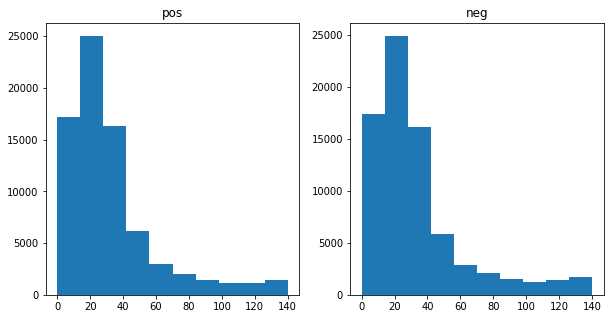

In [ ]:
fig, (ax_1, ax_2) = plt.subplots(1,2 , figsize=(10, 5))

data_1 = train[train["label"] == 1]["document"].str.len()
ax_1.hist(data_1)
ax_1.set_title("pos")


data_2 = train[train["label"] == 0]["document"].str.len()
ax_2.hist(data_2)
ax_2.set_title("neg")

In [ ]:
train.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
!pip install konlpy
from konlpy.tag import Okt
okt = Okt()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 47.9 MB/s eta 0:00:00


In [ ]:
okt.morphs("집에 갔는데 엄마가고려대 페스츄리를 사왔다")

['집', '에', '갔는데', '엄마', '가', '고려대', '페스', '츄리', '를', '사왔다']

In [ ]:
# stop words 집 갔는 엄마 고려대 페스츄리 사왔
 
# 단어를 토크나이저를 이용해 토크나이징을 한다. keras 에 있는 모듈 사용
# 토큰화 : 문장을 단어로
# 벡터화: {숫자: 단어} dict 를 생성
# 토크나이저+ 벡터화 를 통해서 [문장] -> 단어 -> [벡터]

def word_tokenization(text):
  stop_words = ["는", "을", "를", '이', '가', '의', '던', '고', '하', '다', '은', '에', '들', '지', '게', '도'] # 한글 불용어
  return [word for word in okt.morphs(text) if word not in stop_words]
  # okt.morphs 를 이용해 형태소 분석을 해주고, stop_words가 아니면 list에 추가 

In [ ]:
data = train['document'].apply((lambda x: word_tokenization(x)))
data.head(10)

0                              [아, 더빙, 진짜, 짜증나네요, 목소리]
1        [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍지, 않구나]
2                     [너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한]
3                  [교도소, 이야기, 구먼, 솔직히, 재미, 없다, 평점, 조정]
4    [사이, 몬페, 그, 익살스런, 연기, 돋보였던, 영화, 스파이더맨, 에서, 늙어,...
5    [막, 걸음, 마, 뗀, 세, 부터, 초등학교, 학년, 생인, 살용, 영화, ㅋㅋㅋ...
6                            [원작, 긴장감, 제대로, 살려내지못, 했다]
7    [별, 반개, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 몇, 년,...
8                       [액션, 없는데도, 재미, 있는, 몇, 안되는, 영화]
9    [왜케, 평점, 낮은건데, 꽤, 볼, 만, 한, 데, 헐리우드, 식, 화려함에만, ...
Name: document, dtype: object

In [ ]:
training_size = 120000
train_sentences = data[:training_size]
valid_sentences = data[training_size:]
train_labels = train['label'][:training_size] # Training data
valid_labels = train['label'][training_size:] # validation data

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# threshold값 이상으로 
def get_vocab_size(threshold):
  cnt = 0
  for x in tokenizer.word_counts.values(): #각각의 단어가 출현하는 빈도를 확인 
    if x >= threshold: # threshold값 이상으로 출현하는지 확인한다. 
      cnt = cnt + 1
  return cnt

In [ ]:
oov_tok = "<OOV>"
vocab_size = 15000

tokenizer = Tokenizer(oov_token=oov_tok, num_words=vocab_size)
tokenizer.fit_on_texts(data)
print("단어 사전 개수:", len(tokenizer.word_counts))

단어 사전 개수: 102194


In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences) # 문자를 숫자로 변환 해주는 과정, 각 문장을 벡터로 변환해준다. 
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)

In [ ]:
# train_sequences

In [ ]:
# data[:10], train_sequences[:10]

In [ ]:
max([len(i) for i in train_sequences])# 69인 길이의 문장이 가장 길이가 긴 문장 
max_length = 40 
# 긴문장 -> 짤라준다.
# 짧은 문자 -> padding 을 추가 해준다. 
# 문장의 길이를 동일하게 맞춰서 학습시켜준다, 
# pad_sequences

In [ ]:
trunc_type='post' #길이가 길면 앞부분은 유지하고 뒷부분을 잘라준다. 
padding_type='post' #길이가 짧으면 앞부분은 유지하고 뒷부분을 0으로 채워준다. 

# pad_sequences f를 이용해 학습시에 가변길이 대신 고정기이를 input넣어 학습 시킨다. 
train_padded = pad_sequences(train_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)
valid_padded = pad_sequences(valid_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)

train_labels = np.asarray(train_labels)
valid_labels = np.asarray(valid_labels)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 300,input_length = max_length)) # 단어 임베딩 레이어 
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=False))) # Bidirectional : 양방향 LSTM 학습 -> 모델의 성능 향상 
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 300)           4500000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              140400    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                3232      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,643,698
Trainable params: 4,643,698
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_path = 'best_weight.ckpt'
cp = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss',
                                                verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
history = model.fit(train_padded, train_labels, 
                validation_data=(valid_padded, valid_labels), 
                callbacks=[cp, es], batch_size=64, epochs=5, verbose=2)

Epoch 1/5

Epoch 1: val_loss did not improve from 0.33624
1875/1875 - 20s - loss: 0.2889 - accuracy: 0.8714 - val_loss: 0.3411 - val_accuracy: 0.8519 - 20s/epoch - 11ms/step
Epoch 2/5

Epoch 2: val_loss did not improve from 0.33624
1875/1875 - 20s - loss: 0.2325 - accuracy: 0.8975 - val_loss: 0.3769 - val_accuracy: 0.8487 - 20s/epoch - 11ms/step
Epoch 3/5

Epoch 3: val_loss did not improve from 0.33624
1875/1875 - 21s - loss: 0.1776 - accuracy: 0.9244 - val_loss: 0.4197 - val_accuracy: 0.8404 - 21s/epoch - 11ms/step


In [ ]:
def movie_review():
  test_input = input("값을 입력하세요")
  tmp = word_tokenization(test_input)
  word_vec=[list(np.array(tokenizer.texts_to_sequences(tmp))[:,0])]
  test_padded = pad_sequences(word_vec, truncating=trunc_type, padding=padding_type, maxlen=max_length)
  result = model.predict(test_padded)
  print(f"{result[0][1]*100}으로 긍정 리뷰 입니다.")

In [ ]:
movie_review()

값을 입력하세요올빼미
1/1 [==============================] - 0s 16ms/step
51.762449741363525으로 긍정 리뷰 입니다.


In [ ]:
# 네이버 영화를 크롤링하고
# 최신 데이터를 이용해 다시 학습시켜 보세요. 